## Installing the required libraries

In [9]:
#import all of the required libraries and classes right here
# Pandas is for data manipulation, scikit-learn is 
# for machine learning tools, and matplotlib is for data visualization.

import pandas as pd
import re
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

warnings.simplefilter('ignore')#ignore warnings during execution

## Data Ingestion

In [8]:
df=pd.read_excel('Coffee_shop_data.xlsx')
population=pd.read_csv('population.csv',skiprows=[0])

In [10]:
population.head()

,Geography,Label for GEO_ID,Race/Ethnic Group,Population Groups,Total,Errata of Total,Total!!1-person household,Total!!2-person household,Total!!3-person household,Total!!4-person household,Total!!5-person household,Total!!6-person household,Total!!7-or-more-person household
0,8600000US89010,ZCTA5 89010,1,Total population,172,NaN,51,69,19,12,12,4,5
1,8600000US89019,ZCTA5 89019,1,Total population,1164,NaN,412,421,134,83,57,32,25
2,8600000US89060,ZCTA5 89060,1,Total population,4144,NaN,1106,1714,550,361,222,95,96
3,8600000US89061,ZCTA5 89061,1,Total population,2109,NaN,469,936,283,206,112,62,41
4,8600000US89439,ZCTA5 89439,1,Total population,671,NaN,193,314,88,55,17,2,2


In [11]:
df.head()#checking first five rows

,ID no.,Business Name,Street address,City,State,Zip Code,Phone,Rating,Gender majority,Median Salary,Latte Price
0,1,Brew Haven,8 Old Shore Place,Oakland,California,94616,415-810-4769,4.5,Male,72463,3.31000
1,2,Bean Bliss,6650 Clarendon Crossing,Stockton,California,95210,209-701-1665,5.0,Female,87117,5.35000
2,3,Caffeine Cove,7281 Buell Road,Fresno,California,93773,559-137-3554,4.7,Male,86394,4.15000
3,4,Mug Magic,670 Jackson Avenue,Torrance,California,90510,818-789-5573,4.3,Male,88343,5.34000
4,5,Daily Grind,37 Ludington Terrace,San Diego,California,92196,619-354-2389,1.6,Male,77795,4.51175


In [12]:
# check for data info
df.info()
#our data types checks out

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID no.           1000 non-null   int64  
 1   Business Name    1000 non-null   object 
 2   Street address   1000 non-null   object 
 3   City             1000 non-null   object 
 4   State            1000 non-null   object 
 5   Zip Code         1000 non-null   int64  
 6   Phone            1000 non-null   object 
 7   Rating           1000 non-null   float64
 8   Gender majority  1000 non-null   object 
 9   Median Salary    1000 non-null   int64  
 10  Latte Price      1000 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 86.1+ KB


In [14]:
#check the number of records and features i.e. rows and columns
df.shape

(1000, 11)

In [15]:
population.shape

(1705, 13)

In [17]:
# get basic stats about the data from the coffee shop
df.describe()
#see avergae latte price and salary

,ID no.,Zip Code,Rating,Median Salary,Latte Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,92976.163000,3.784600,81182.842000,5.061491
std,288.819436,1706.943177,1.150717,5142.670356,0.352002
min,1.000000,90005.000000,1.000000,72001.000000,3.090000
25%,250.750000,91751.750000,3.200000,76776.000000,4.830175
50%,500.500000,92883.000000,4.240000,81113.000000,5.062450
75%,750.250000,94257.000000,4.580000,85684.000000,5.310025
max,1000.000000,96154.000000,5.000000,89978.000000,6.480000


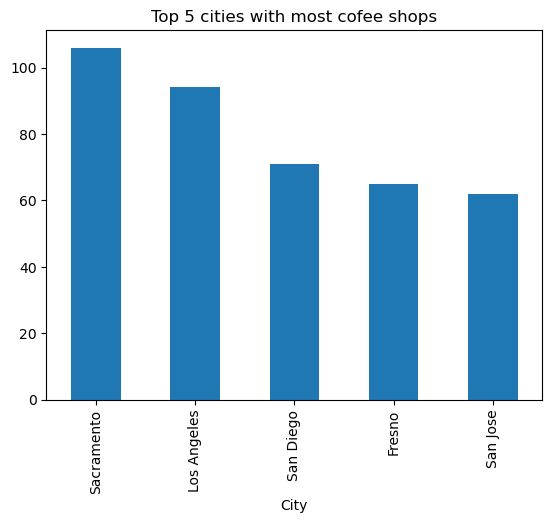

In [18]:
#plot the coffee shop across top 5 cities based on occurences and creates a bar plot
ax=df['City'].value_counts().head(5).plot(kind='bar')
ax.set_title('Top 5 cities with most cofee shops')
plt.show()

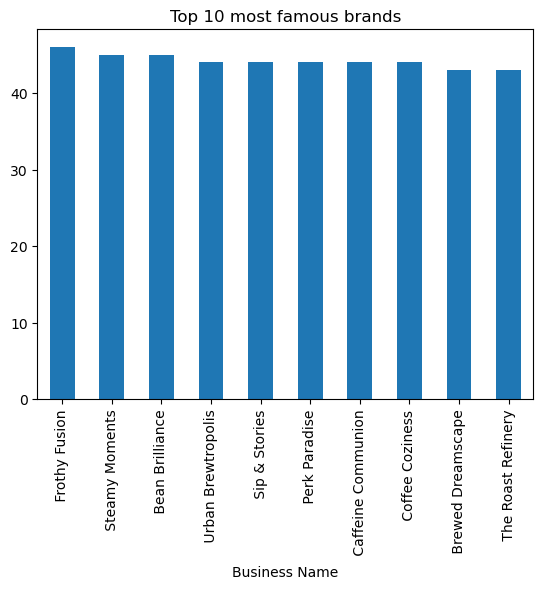

In [19]:
ax=df['Business Name'].value_counts().head(10).plot(kind='bar')
ax.set_title('Top 10 most famous brands')
plt.show()

## Data Preprocessing

In [20]:
df.isna().sum() #check the null values in each column of the  dataframe
# no null values
# if we have null values we would impute it. If we have numberical replace mean. Missing values - replace it with the mode (most occuring values)

ID no.             0
Business Name      0
Street address     0
City               0
State              0
Zip Code           0
Phone              0
Rating             0
Gender majority    0
Median Salary      0
Latte Price        0
dtype: int64

In [21]:
#converting zipcode to object data (str) - We need to join the zip code with the population data. Converting the coffee shop data. In order to store it into alphanumerical value, it should be string.
df['Zip Code']=df['Zip Code'].astype(str)

In [22]:
#extract zip code from population
# Find all of the zipcode that has a 5 digit pattern. Getting the last 5 digits from the population zip code. Creating a new column called zip code

def find_zip_code(geocode):
    pattern = r'\d{5}$'

    match = re.search(pattern, geocode)

    if match:
        zip_code = match.group(0)
    return zip_code


In [24]:
# The actual coversion is below. The above is the function
#extracts the last 5 digits of the Geograhy column

population['Zip Code']=population['Geography'].apply(find_zip_code)

In [25]:
cafe_data=df.copy()
# merging the population via zip code as population is an important feature to determing the price / locations
df=pd.merge(cafe_data,population)
#notice that the data size is reduced afer a join

In [26]:
#keeping only Total from population. In the pop dataset, keeping total population column and other columns.
columns=cafe_data.columns.values.tolist()+['Total']
df=df[columns]
#rename Total to Population
df=df.rename(columns={"Total":"Population"})

In [27]:
df

,ID no.,Business Name,Street address,City,State,Zip Code,Phone,Rating,Gender majority,Median Salary,Latte Price,Population
0,2,Bean Bliss,6650 Clarendon Crossing,Stockton,California,95210,209-701-1665,5.00,Female,87117,5.35000,11180
1,316,Caffeine Castle,72 Oak Crossing,Stockton,California,95210,209-149-9942,4.75,Male,87117,5.44385,11180
2,725,Frothy Fusion,9266 Susan Point,Stockton,California,95210,209-877-9648,4.19,Female,87117,5.09785,11180
3,908,Urban Brewtropolis,92 Hoepker Parkway,Stockton,California,95210,209-651-1370,4.50,Male,87117,5.53185,11180
4,6,Espresso Elegance,8427 Atwood Road,Visalia,California,93291,559-929-4731,1.20,Female,78753,5.31765,15310
...,...,...,...,...,...,...,...,...,...,...,...,...
407,659,The Roast Refinery,26967 Stone Corner Place,San Francisco,California,94121,858-344-2510,5.00,Female,80124,4.72020,17295
408,764,The Roast Refinery,684 Rockefeller Pass,San Francisco,California,94121,415-398-5800,4.15,Male,80124,4.71220,17295
409,664,Java Joyhouse,9681 Butterfield Alley,Inglewood,California,90305,310-377-5635,4.69,Male,76776,5.01280,5933
410,804,Steamy Moments,9602 Mallory Street,Inglewood,California,90305,310-846-1674,4.50,Female,76776,4.78480,5933


In [28]:
#keeping only relevant features
df= df[['Zip Code','Rating','Median Salary','Latte Price','Population']]
#df.shape


In [29]:
df.columns    

Index(['Zip Code', 'Rating', 'Median Salary', 'Latte Price', 'Population'], dtype='object')

In [32]:
# Calculate the total number of coffee shops for each zip code
coffee_shop_counts = df['Zip Code'].value_counts().reset_index()
coffee_shop_counts.columns = ['Zip Code', 'CoffeeShopCount']

# Ensure 'Zip Code' is of type string in both DataFrames
df['Zip Code'] = df['Zip Code'].astype(str)
coffee_shop_counts['Zip Code'] = coffee_shop_counts['Zip Code'].astype(str)

# Merge the counts back into the original DataFrame
df = df.merge(coffee_shop_counts, on='Zip Code', how='left')

# Print the updated DataFrame
print(df)

# Criteria:
# a. High population
# b. Low total number of coffee shops
# c. Low ratings
# d. High median salary

# Sorting the DataFrame based on the criteria
sorted_df = df.sort_values(by=['Population', 'CoffeeShopCount', 'Rating', 'Median Salary'],
                           ascending=[False, True, True, False]).reset_index(drop=True)


    Zip Code  Rating  Median Salary  Latte Price  Population  \
0      95210    5.00          87117      5.35000       11180   
1      95210    4.75          87117      5.44385       11180   
2      95210    4.19          87117      5.09785       11180   
3      95210    4.50          87117      5.53185       11180   
4      93291    1.20          78753      5.31765       15310   
..       ...     ...            ...          ...         ...   
407    94121    5.00          80124      4.72020       17295   
408    94121    4.15          80124      4.71220       17295   
409    90305    4.69          76776      5.01280        5933   
410    90305    4.50          76776      4.78480        5933   
411    90025    4.50          85001      5.37405       21228   

     CoffeeShopCount_x  CoffeeShopCount_y  CoffeeShopCount  
0                    4                  4                4  
1                    4                  4                4  
2                    4                  4       

In [34]:
# Created a list - if length of list 5, if the zip code is already present, it will not add that into the list. 
# Deduping zip code column and displaying all of the records for the top 5.
lst=[]
for i in range(len(sorted_df)):
    if len(lst)!=5:#check if length of list is <5
        if (sorted_df['Zip Code'][i]) not in lst:#check if current Zip Code is in the list
            lst.append(sorted_df['Zip Code'][i])
            
# Filter 'sorted_df' to include only rows where 'Zip Code' is in 'lst'
top_5_zip_codes_df = sorted_df[sorted_df['Zip Code'].isin(lst)]

top_5_zip_codes_df

,Zip Code,Rating,Median Salary,Latte Price,Population,CoffeeShopCount_x,CoffeeShopCount_y,CoffeeShopCount
0,94110,2.22,74020,5.04500,27128,5,5,5
1,94110,3.50,74020,5.04700,27128,5,5,5
2,94110,4.40,74020,5.05900,27128,5,5,5
3,94110,4.50,74020,4.77900,27128,5,5,5
4,94110,4.70,74020,4.58100,27128,5,5,5
5,90805,3.00,88140,5.47900,26056,4,4,4
6,90805,3.89,88140,5.31900,26056,4,4,4
7,90805,4.31,88140,5.02100,26056,4,4,4
8,90805,4.37,88140,5.20700,26056,4,4,4
9,95823,4.30,73165,4.96825,22470,3,3,3


In [36]:
#Create a feature matrix for machine learning model
X = df.drop(['Latte Price', 'Zip Code'], axis=1)  # Features excluding 'Latte Price' and 'Zip Code'
y = df['Latte Price']  # Target variable

In [40]:
#results assigned to X_train,...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)#20% of data used for testing

In [43]:
#feature scaling, ensure that features have mean of 0 and std of 1
sc = StandardScaler()#standardize the features from the scikit learng

X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Model Selection

In [47]:
#Model Selection
#Regression models are used for continuous variables i.e. price-number of latte from 3 zip codes identify
#categorical variable will be expensive or cheap
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}


# Hyperparameter tuning

In [49]:
#Hyperparameter Tuning
#specifies the hyperparameters for each model
#n_estimators=number of trees
#max_depth of each tree in the forest
param_grid = {
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 10]},
}


In [50]:
for model_name, model in models.items():
    if model_name in param_grid:
        # Perform hyperparameter tuning using GridSearchCV
        #explores the hyperparameters to optimise the model
        grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X, y)

        # Set the best hyperparameters to the model
        models[model_name] = grid_search.best_estimator_


# Model Training

In [51]:
#Model Training
for model_name, model in models.items():
    # Train the model on the training set
    model.fit(X_train, y_train)

In [52]:
# Model Evaluation
for model_name, model in models.items():
    # Evaluate the model on the testing set
    y_pred = model.predict(X_test)
    print(f"{model_name} Metrics:")
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R-squared:", r2_score(y_test, y_pred))
    print()



Linear Regression Metrics:
Mean Absolute Error: 0.2179469416812182
Mean Squared Error: 0.06760097542831553
R-squared: 0.497440616791904

Random Forest Metrics:
Mean Absolute Error: 0.24145007165484061
Mean Squared Error: 0.08697019160299159
R-squared: 0.3534459292553067

Gradient Boosting Metrics:
Mean Absolute Error: 0.22484266824587004
Mean Squared Error: 0.07648279864721322
R-squared: 0.43141133880632454



# Predictions

In [53]:
#We want this dataframe to be same as the training data so that model can predict the value
zip_codes_df= top_5_zip_codes_df.drop(['Zip Code', 'Latte Price'], axis=1)
zip_codes_df= sc.transform(zip_codes_df)

In [54]:
for model_name, model in models.items():
    # Predict the prices for lattes in the top 5 zip codes
    predicted_prices = model.predict(zip_codes_df)
    print(f"{model_name} Predicted Prices for Top 5 Zip Codes:")
    print(predicted_prices)
    print()

Linear Regression Predicted Prices for Top 5 Zip Codes:
[15939.57695417 15939.58102142 15939.58388121 15939.58419896
 15939.58483447 18975.73927555 18975.74210356 18975.74343812
 18975.74362878 15753.09077765 15753.09242997 15753.09281127
 15522.00270954 15522.0031544  15522.00331328 15522.0035357
 15522.0035357  15522.00550578 18297.93564366]

Random Forest Predicted Prices for Top 5 Zip Codes:
[5.48750104 5.48750104 5.48750104 5.48750104 5.48750104 5.48750104
 5.48750104 5.48750104 5.48750104 5.48750104 5.48750104 5.48750104
 5.48750104 5.48750104 5.48750104 5.48750104 5.48750104 5.48750104
 5.50701904]

Gradient Boosting Predicted Prices for Top 5 Zip Codes:
[5.41348343 5.41348343 5.41348343 5.41348343 5.41348343 5.41348343
 5.41348343 5.41348343 5.41348343 5.41348343 5.41348343 5.41348343
 5.41348343 5.41348343 5.41348343 5.41348343 5.41348343 5.41348343
 5.41348343]



In [55]:
predictions = {}

for model_name, model in models.items():
    # Predict the prices for lattes in the top 5 zip codes
    predicted_prices = model.predict(zip_codes_df)
    predictions[model_name] = predicted_prices

# Convert the predictions dictionary to a DataFrame
predictions_df = pd.DataFrame(predictions)
# Add the zip codes to the predictions DataFrame
predictions_df['Zip Code'] = top_5_zip_codes_df['Zip Code'].values

# Rearrange the columns to have 'Zip Code' as the first column
cols = ['Zip Code'] + [col for col in predictions_df.columns if col != 'Zip Code']
predictions_df = predictions_df[cols]

predictions_df

,Zip Code,Linear Regression,Random Forest,Gradient Boosting
0,94110,15939.576954,5.487501,5.413483
1,94110,15939.581021,5.487501,5.413483
2,94110,15939.583881,5.487501,5.413483
3,94110,15939.584199,5.487501,5.413483
4,94110,15939.584834,5.487501,5.413483
5,90805,18975.739276,5.487501,5.413483
6,90805,18975.742104,5.487501,5.413483
7,90805,18975.743438,5.487501,5.413483
8,90805,18975.743629,5.487501,5.413483
9,95823,15753.090778,5.487501,5.413483


In [58]:
#aggregation functions for highest to minimum
agg_df = predictions_df.groupby('Zip Code')['Gradient Boosting'].agg([("Highest", "max"), ("Lowest", "min")]).reset_index()
agg_df.columns = ['Zip Code', 'Highest', 'Lowest']#rename the columns
print(agg_df)

  Zip Code   Highest    Lowest
0    90025  5.413483  5.413483
1    90805  5.413483  5.413483
2    94110  5.413483  5.413483
3    94544  5.413483  5.413483
4    95823  5.413483  5.413483
